In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv(r'C:\Users\ZBOOK\Downloads\1000_Companies.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


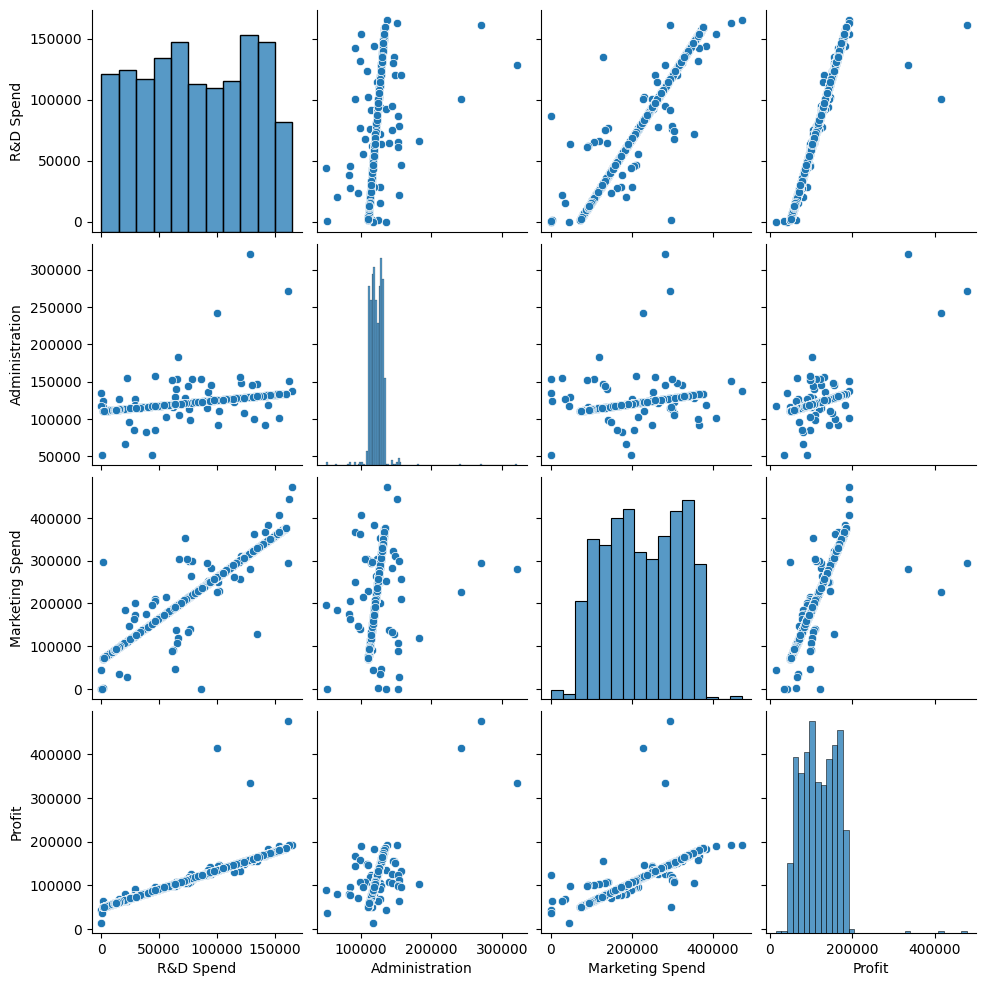

In [6]:
sns.pairplot(data)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.582434         0.978407  0.945245
Administration    0.582434        1.000000         0.520465  0.741560
Marketing Spend   0.978407        0.520465         1.000000  0.917270
Profit            0.945245        0.741560         0.917270  1.000000


<Axes: >

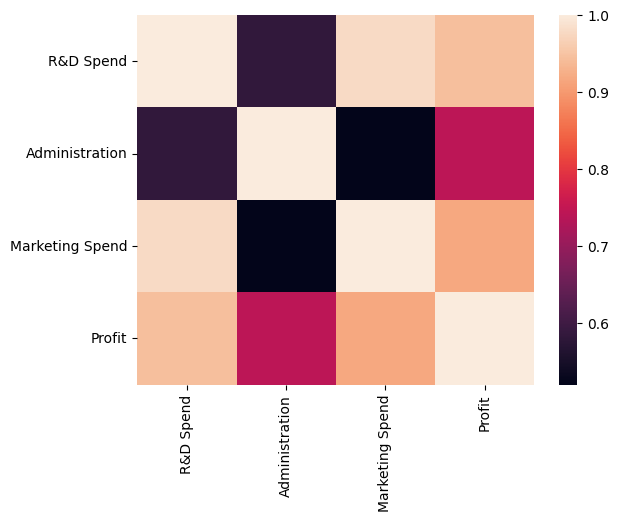

In [16]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
print(numeric_data.corr())
sns.heatmap(numeric_data.corr())

In [25]:
X = data[['R&D_Spend', 'Administration', 'Marketing_Spend']]
Y = data['Profit']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [39]:
predictions = lm.predict(X_test)
predictions

array([176803.87871838,  94167.42581877,  68651.06901446,  74166.27366781,
        89604.69815667, 183166.11374344, 174267.10925578, 110259.2736938 ,
       141589.02442674,  59655.26103334, 150395.54707413,  89579.6329314 ,
        55264.53236579, 166859.05106592, 138612.31780998, 105358.59817787,
       116220.46580993, 168874.63756466, 106361.52595219, 115289.59672474,
       166497.76664643, 164358.58294478,  67498.07057049,  50847.87414422,
       165324.0246262 , 137148.16539706, 142157.74485175, 114595.55043373,
        63019.18153626, 149911.52969241,  86633.15625297,  97591.8484723 ,
       149463.81365565, 179618.09379788,  92540.78186859,  69946.6796671 ,
       130566.39391702, 176940.44070058,  62235.24630632, 101183.94864541,
       156985.09735115, 164438.96433906, 161936.76755831, 182612.08675732,
       175063.14493276, 113178.07106304, 233908.15376248, 123644.94601266,
       166407.01346577, 162321.38854348, 153658.34252019, 160065.52201348,
       115123.64795039,  

In [47]:
print(lm.coef_)
coef = pd.DataFrame(lm.coef_,X.columns, columns=["coef"])
coef

[0.67043416 0.85622691 0.03494736]


,coef
R&D_Spend,0.670434
Administration,0.856227
Marketing_Spend,0.034947


In [41]:
print(lm.intercept_)

-48401.804586460494


In [51]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.9080976194702178